
# 项目：巴西预约挂号数据分析

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

自从有了预约挂号，看病方便了许多，再也不用早早等在医院挂号。可是，有些人预约了又没去，甚至屡屡爽约。据部分医院统计，自开设预约挂号以来，患者爽约率竟高达25%，这不仅浪费了宝贵的医疗资源，更人为延长了其他患者的候诊时间。本数据集通过分析10万条巴西预约挂号的求诊信息，研究病人是否如约前往医院就诊，有哪些重要因素能够帮助我们预测患者是否会按照其挂号预约前往医院就诊？

In [1]:
#   导入语句。
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## 数据整理


### 常规属性

加载数据，并使用shape、head、info等方法来查看数据中的基本信息。

In [2]:
# 加载数据并打印几行。进行这几项操作，来检查数据
# 类型，以及是否有缺失数据或错误数据的情况。
df_noshow= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

首先查看预约挂号的求诊信息(noshowappointments-kagglev2-may-2016.csv)基本信息

In [3]:
df_noshow.shape

(110527, 14)

In [4]:
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


整理数据集各列名含义如下：
```
PatientId：患者ID
AppointmentID：预约ID
Gender：性别
ScheduledDay：预约就诊日期
AppointmentDay：预约日
Age：年龄
Neighbourhood：医院所在位置
Scholarship：福利保障
Hipertension：高血压
Diabetes：糖尿病
Alcoholism：酒精中毒
Handcap：残疾等级（应为Handicap）
SMS_received：是否收到短信（0表示没有收到短信，1表示收到短信）
No-show：是否如约就诊（“No”表示病人已如约就诊，“Yes”说明病人未前往就诊。）
```

In [5]:
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
sum(df_noshow.duplicated())

0

通过数据打印结果，我们可以看出数据集虽然总量很大（110527行，14列），但是数据非常完整，没有缺失值和重复数据；主要数据类型为int64（整型）、str（字符串）和float（浮点型），部分数据可能根据需要进行类型转换，列名错误需要进行修正，方便分析。

### 数据清理（请用更具体的标题来代替该标题。）

In [7]:
# 将No-show中的符号转化为下划线，修改Handcap列名错误
df_noshow.rename(columns={'No-show':'No_show','Handcap':'Handicap'}, inplace = True)
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


下面根据实际情况对部分数据类型进行修改

In [8]:
#新增No_show_bool列，将No_show中的字符转化为数字，方便后面计算。
df_noshow['No_show_bool']=df_noshow['No_show'].map({'No':1, 'Yes':0})
df_noshow.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,No_show_bool
10812,1.347315e+14,5685839,F,2016-05-11T11:16:55Z,2016-05-18T00:00:00Z,32,ANDORINHAS,0,0,0,0,0,0,No,1
17500,4.265757e+11,5685784,M,2016-05-11T11:08:19Z,2016-05-11T00:00:00Z,8,SANTO ANDRÉ,0,0,0,0,0,0,No,1
48991,7.484111e+13,5693023,M,2016-05-12T17:12:52Z,2016-05-17T00:00:00Z,46,JARDIM DA PENHA,0,0,0,0,0,0,No,1
52094,3.941419e+13,5664957,M,2016-05-05T13:43:18Z,2016-05-09T00:00:00Z,57,BENTO FERREIRA,0,1,1,0,0,0,No,1
77366,7.948120e+14,5664216,M,2016-05-05T11:31:23Z,2016-05-05T00:00:00Z,34,BELA VISTA,0,0,0,0,0,0,No,1


In [9]:
#预约时间及就诊日期，本次分析只考虑日期问题，将数据中时间信息暂时删除，为后续计算天数差做准备。
df_noshow['AppointmentDay']=pd.to_datetime(df_noshow['AppointmentDay'])
df_noshow['ScheduledDay']=pd.to_datetime(df_noshow['ScheduledDay']).dt.normalize()
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,No_show_bool
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,1
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1


In [10]:
#患者ID在数据集中为浮点型数据，使用科学计数法影响数据精度，需要转化成字符串类型，首先转化为整型数据，显示全部位数。
df_noshow['PatientId']=df_noshow['PatientId'].astype('int64')
df_noshow['PatientId'].max()

999981631772427

In [11]:
#按照最大数值，默认ID长度15位数字，统一转化为字符串，不足位数用0不足
df_noshow['PatientId']=df_noshow['PatientId'].astype('str')
df_noshow['PatientId']=df_noshow['PatientId'].str.zfill(15)
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,No_show_bool
0,029872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1
2,004262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,1
3,000867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1
4,008841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1


经过简单的处理，数据已经基本满足我们的要求。

<a id='eda'></a>
## 探索性数据分析


下面开始统计各个变量与是否就诊的数量，创建可视化图表，分析有哪些重要因素能够帮助我们预测患者是否会按照其挂号预约前往医院就诊？

In [12]:
#首先创建一个函数，用于将各变量用图形进行可视化
def get_chart(kind,column,proportion=False):
    """
    计算各数据中如约就诊的比例
    Arg:
        (str) kind-输入需要绘制的图形：目前仅支持bar（柱状图）和pie（饼图）
        (str) column - 输入需要计算的列名
        可选变量(bool) proportion - 是否需要求就诊率
    Return:
        生成可视化图形
    """
    #绘制柱状图
    if kind=='bar':
        if proportion==True:
            df_noshow.groupby([column])['No_show_bool'].mean().plot(kind='bar')
            plt.title('Proportion about {}'.format(column))
            plt.ylabel('Proportion')
        else:
            df_noshow.groupby([column,'No_show'])['AppointmentID'].count().unstack().plot(kind='bar',stacked=True)
            plt.title('Number of visits about {}'.format(column))
            plt.ylabel('Count')
    #绘制饼图
    elif kind=='pie':
        get_pie=df_noshow.groupby(column)[column].count()
        get_pie.plot(kind='pie',autopct='%.2f%%',figsize=(6,6),shadow = False,explode = (0.15 , 0),startangle = 90)
        plt.title('Proportion about {}'.format(column))

### 年龄

In [13]:
#新建年龄段变量,对病人根据年龄分组
bins=np.arange(0,110,10)
df_noshow['Age_group']=pd.cut(df_noshow['Age'],bins)

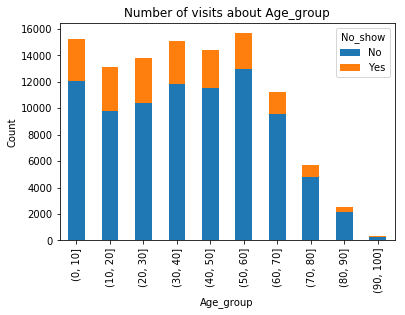

In [14]:
get_chart('bar','Age_group',proportion=False)

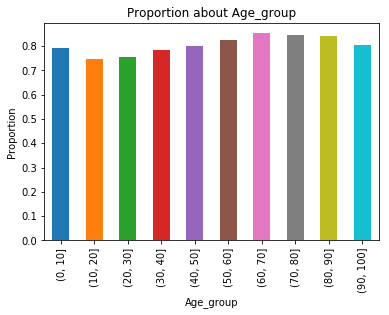

In [15]:
get_chart('bar','Age_group',proportion=True)

从图形上看，10-20岁之间就诊率相对较低，20-70岁就诊率逐渐升高，70岁以后又出现下降趋势。

### 提前预约天数

In [16]:
#新建预约天数变量,对病人根据预约天数进行分组
bins=np.arange(0,80,10)
df_noshow['Time_difference']=pd.cut((df_noshow['AppointmentDay']-df_noshow['ScheduledDay']).dt.days,bins)

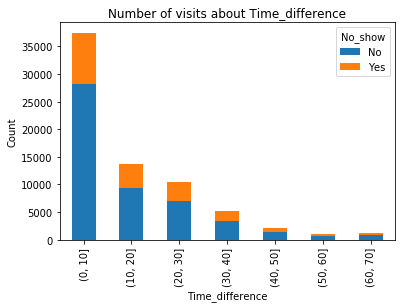

In [17]:
get_chart('bar','Time_difference',False)

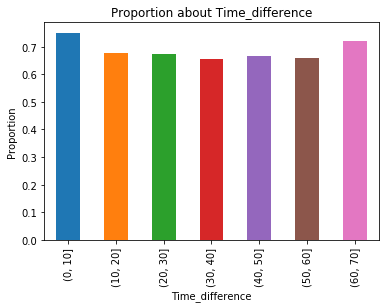

In [18]:
get_chart('bar','Time_difference',True)

本次分析只研究提前预约天数与就诊率之间的关系，从图上看出，提前10天以内预约的患者，就诊率较高。

### 患者条件分析

In [19]:
#创建一个函数，用于计算各数据中如约就诊的比例，简化代码
def get_proportion(column):
    """
    计算各数据中如约就诊的比例
    Arg:
        (str) column - 输入需要计算的列名
    Return:
        (dataframe) 生成包含所选列及就诊比例的dataframe，可直接用于创建图表
    """
    #统计所选列如约就诊和未如约就诊的数量并计算比例
    df_analyse=df_noshow.groupby([column,'No_show']).count().unstack()['AppointmentID']
    #填充缺失值，将缺失值统一更新为0
    df_analyse.fillna(0,inplace=True)
    #计算比例
    df_analyse['Show_Pro']=df_noshow.groupby([column])['No_show_bool'].mean()
    df_analyse['No_show_Pro']=1-df_analyse['Show_Pro']
    #将所选列内容由索引变为df_analyse一列
    df_analyse.reset_index(inplace=True)
    return df_analyse

In [20]:
hipertension_pro=get_proportion('Hipertension')
diabetes_pro=get_proportion('Diabetes')
alcoholism_pro=get_proportion('Alcoholism')
scholarship_pro=get_proportion('Scholarship')

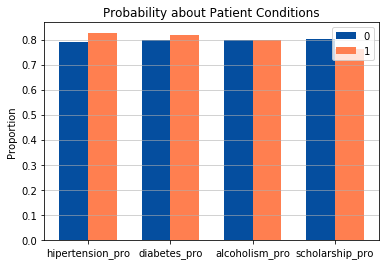

In [21]:
width=0.35
xaxis=0
for i in [hipertension_pro,diabetes_pro,alcoholism_pro,scholarship_pro]:
    plt.bar(xaxis-width/2,i.iloc[0,3],width,color='#054E9F')
    plt.bar(xaxis+width/2,i.iloc[1,3],width,color='coral')
    xaxis+=1
plt.xticks(np.arange(4),['hipertension_pro','diabetes_pro','alcoholism_pro','scholarship_pro'])
plt.ylabel('Proportion')
plt.grid(axis='y',alpha=0.7)
plt.title('Probability about Patient Conditions')
plt.legend([0,1],loc='upper right')
plt.show()

因为高血压、糖尿病、酒精中毒、福利保障数据结构类似，将这四项一起分析，从图中看出，各条件患者就诊率大体相同，拥有福利保障的患者就诊率反而比没有保障的患者要低。

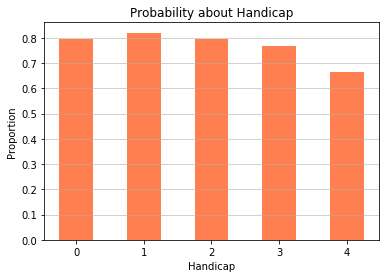

In [22]:
handicap_pro=get_proportion('Handicap')
width=0.5
plt.bar(handicap_pro['Handicap'],handicap_pro.iloc[:,3],width,color='coral')
plt.grid(axis='y',alpha=0.7)
plt.xlabel('Handicap')
plt.ylabel('Proportion')
plt.title('Probability about Handicap')
plt.show()

由于没能查到巴西的残疾分级制度，暂时无法确认横坐标等级含义，由图中可以看出，等级4就诊率最低，只有67%左右，等级1就诊率最高，大约82%。

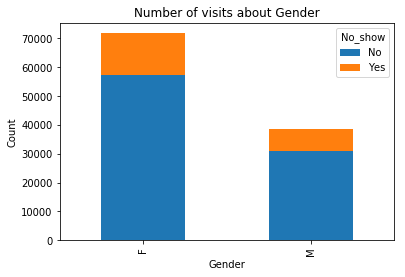

In [23]:
get_chart('bar','Gender',False)

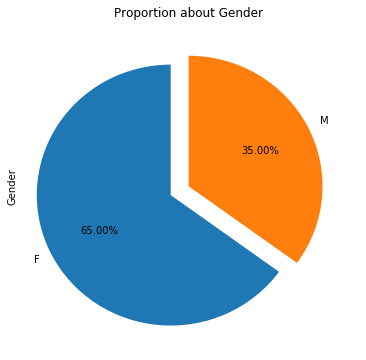

In [24]:
get_chart('pie','Gender')

从患者性别方面来看，女性患者就诊率高达65%，而男性患者按时就诊的比例只有35%

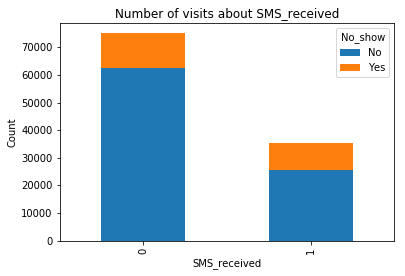

In [25]:
get_chart('bar','SMS_received',False)

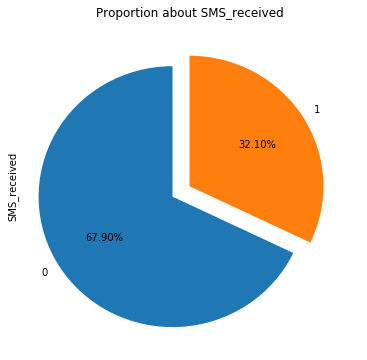

In [26]:
get_chart('pie','SMS_received')

未收到通知短信并按时就诊的比例是67.9%，而收到通知短信并按时就诊的比例反而较低，为32.1%。

<a id='conclusions'></a>
## 结论

本次探索对年龄、预约时间差、患者条件、性别、短信接收情况进行分析，计算各种因素是否如约就诊的比例，绘制成图表进行分析。由于本次分析的局限性，未进行统计检验，无法准确得出影响就诊率原因。因为患者生活方式的差异，时间安排冲突，或者就诊区域的交通及距离问题等，后续还可以对预约时间段、工作日/休息日和医院位置进行分析。经过后面的学习，可以分析出真正的原因，找出重要因素并解决问题，帮助患者更好的利用医疗资源。
